## This will be the EDA notebook, we will look at how many images I am working with and an example of what the images look like. 

In [74]:
import pandas as pd
import numpy as np
from numpy import expand_dims
import os

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [48]:
directory = './Images/'

In [49]:
def Count_files_in_subd(directory):
    for root, dirs, files in os.walk(directory):
        print("{} in {}".format(len(files), root))

In [50]:
def dict_of_files(directory):
    files_dict = {}
    for root, dirs, files in os.walk(directory):
        root = root[9:].replace('_', ' ').title()
        files_dict[root] = len(files)
    return files_dict

In [51]:
files_dict = dict_of_files(directory)
files_dict.pop('')
dog_files_df = pd.DataFrame(data=files_dict.items(), columns=['dog_breed', 'num_pics'])

In [ ]:
pd.set_option('display.max_rows', None)

### How many breeds are we classifying, how many photos are we using, and how balanced is the data?

In [32]:
num_classes = len(files_dict)
print(f'We have a total of {num_classes} represented in the training data')

We have a total of 120 represented in the training data


In [34]:
total_images = dog_files_df['num_pics'].sum()
print(f'We have a total of {total_images} for training')

We have a total of 21515 for training


In [35]:
dog_files_df.sort_values(by='dog_breed', inplace=True)

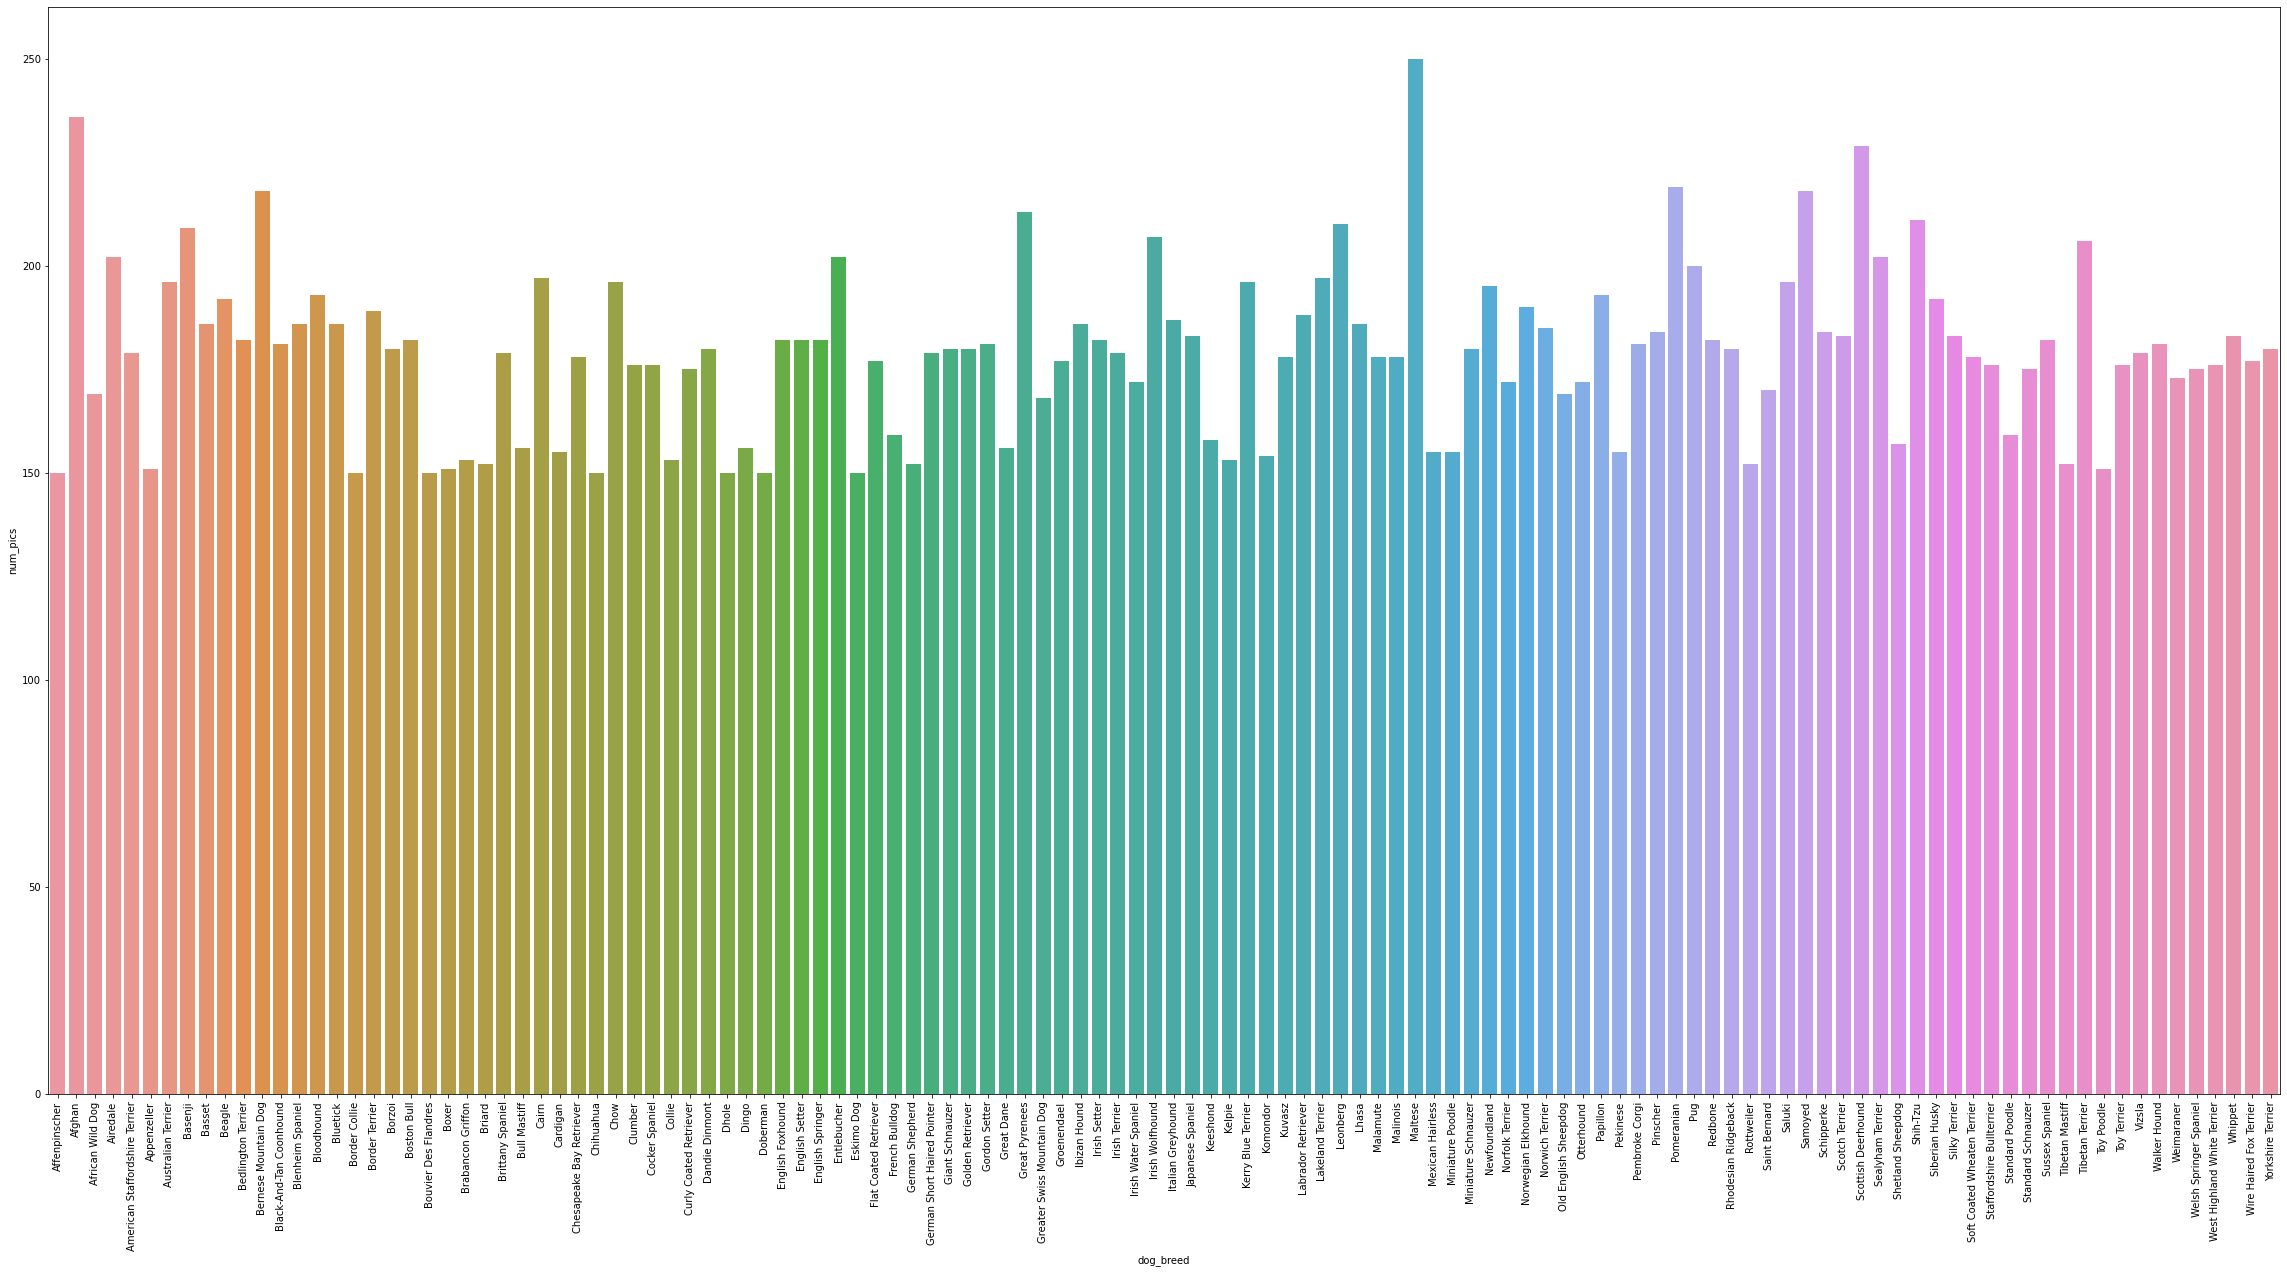

In [36]:
plt.figure(figsize=(40,20))
sns.barplot(data=dog_files_df, x='dog_breed', y='num_pics')
plt.xticks(rotation=90);

Above we can see that the data is relatively balanced. No class is severely under-represented or over-presented.

### Let's see what the breeds look like

In [56]:
breed_list = sorted(list(dog_files_df['dog_breed']))

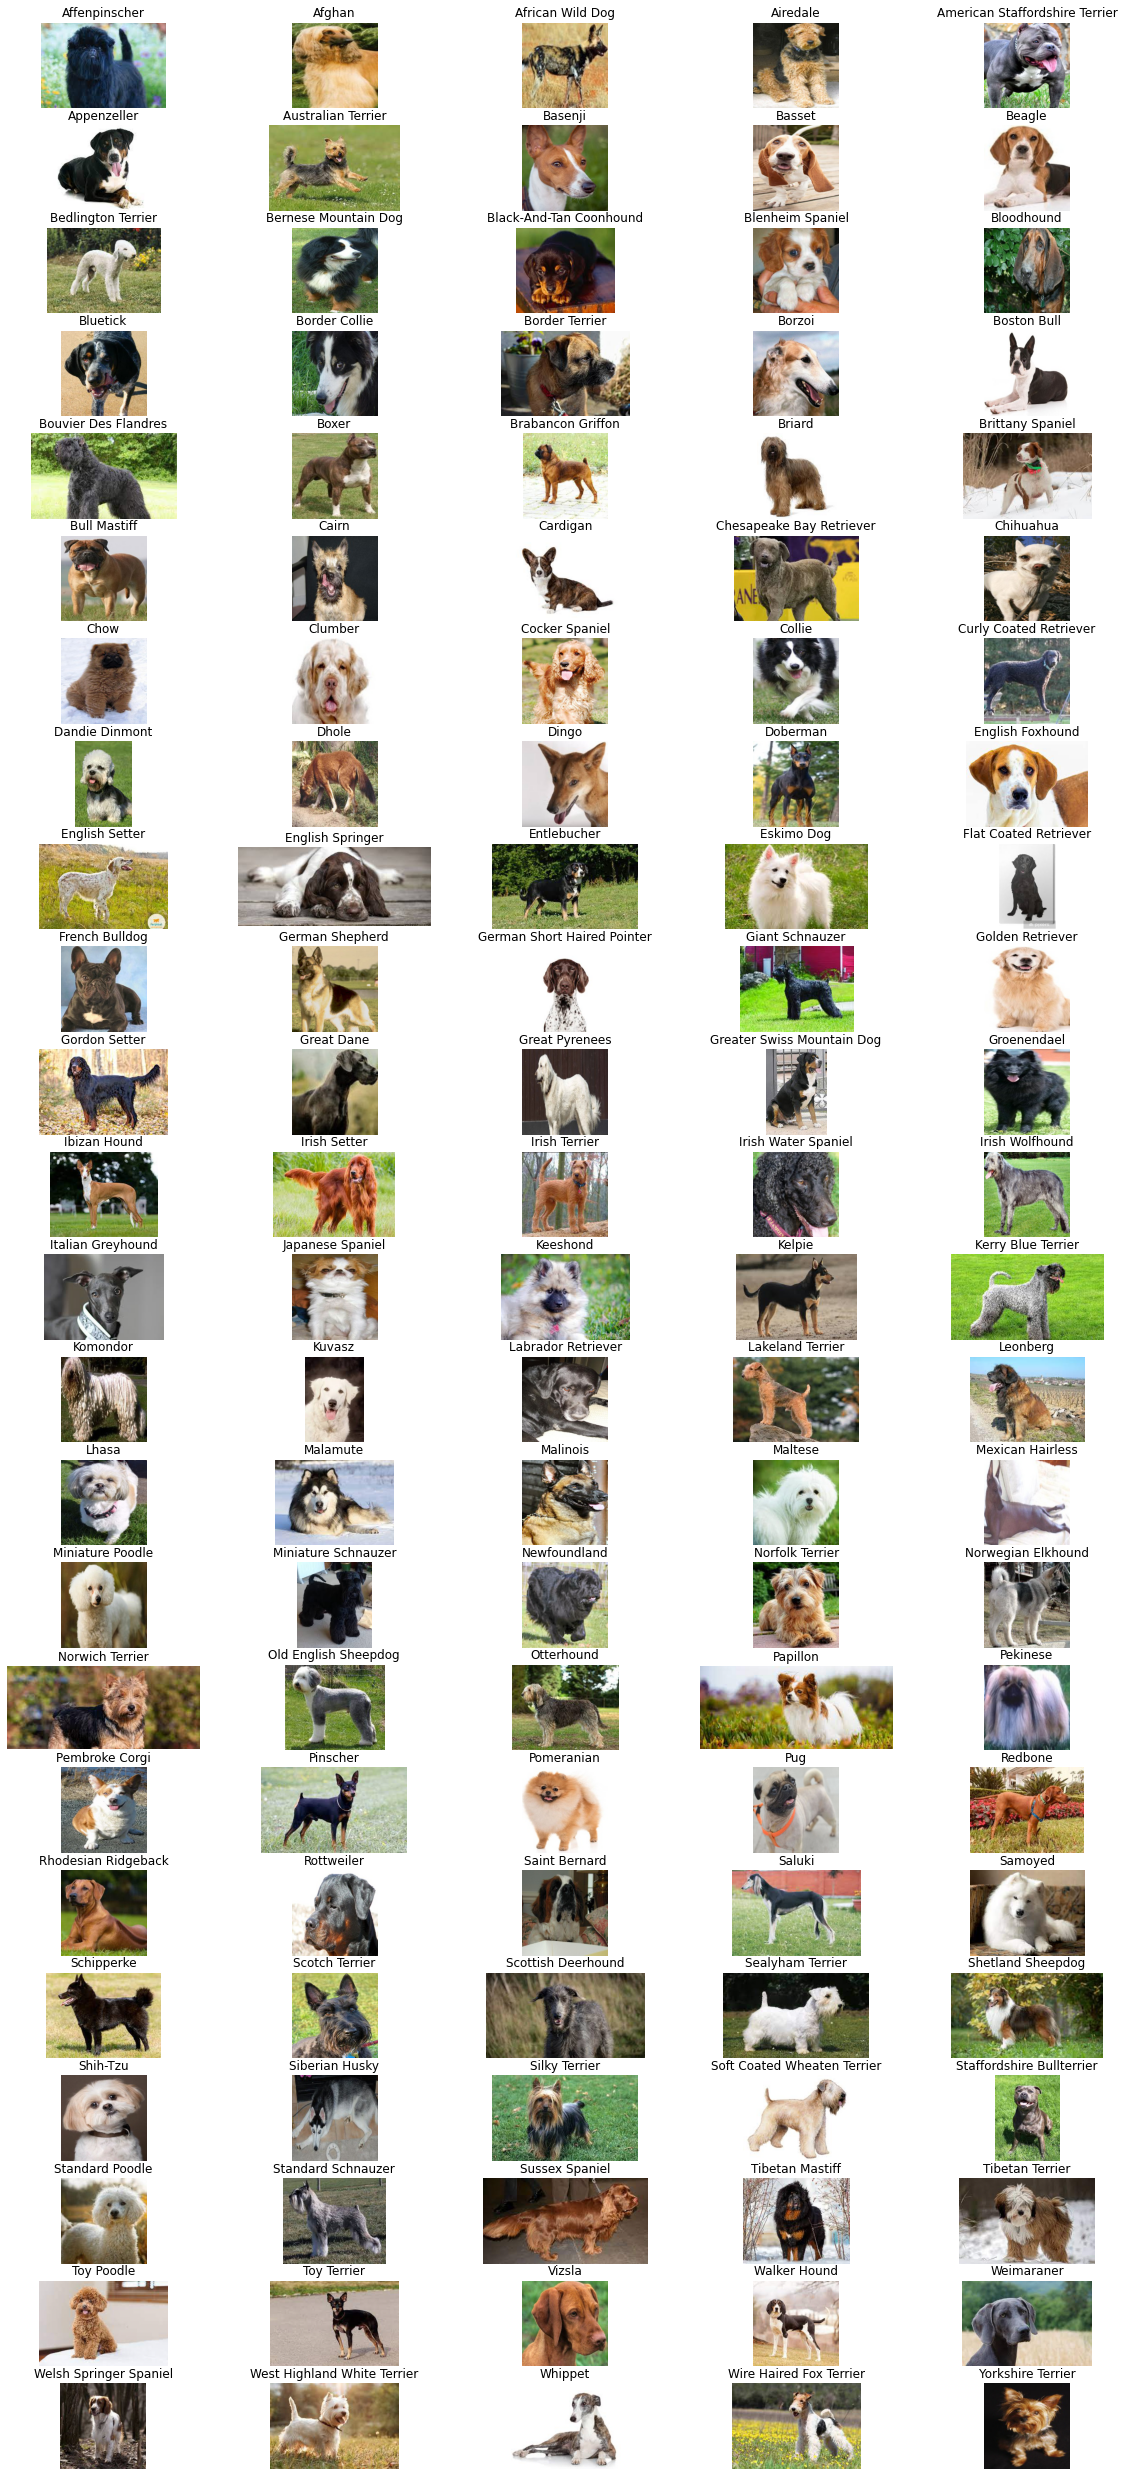

In [65]:
test_dir='./Testing_images/'
classes=len(files_dict)
fig = plt.figure(figsize=(20,45))
if classes % 5==0:
    rows=int(classes/5)
else:
    rows=int(classes/5) +1    
for row in range(rows):
    for column in range(5):
        i= row * 5 + column         
        if i>classes-1:
            break            
        breed=breed_list[i]
        species_path=os.path.join(test_dir, breed)
        f_path=os.path.join(species_path, '001.jpg')        
        img = mpimg.imread(f_path)
        a = fig.add_subplot(rows, 5, i+1)
        imgplot=plt.imshow(img)
        a.axis("off")
        a.set_title(breed)

### Image transformations

For the purposes of model training, we will be doing data augmentation. Let's take a look at what image transformations the model will be seeing

In [70]:
img_width, img_height = 224, 224 
channels = 3
batch_size = 64
num_images= 50
image_arr_size= img_width * img_height * channels

In [71]:
example_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    rotation_range= 20,
    width_shift_range= 0.2,
    height_shift_range= 0.2,   
    validation_split=0.2,

)

example_generator = example_datagen.flow_from_directory(  
    test_dir,  
    target_size= (img_width, img_height), 
    color_mode= 'rgb',
    batch_size= batch_size,  
    class_mode= 'categorical',
    subset='training',
    shuffle= True, 
    seed= 1337
) 


Found 2931 images belonging to 120 classes.


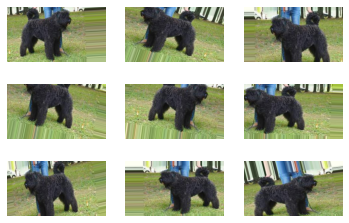

In [75]:
img = load_img('./Testing_images/Bouvier Des Flandres/download-5.jpg')
data = img_to_array(img)
samples = expand_dims(data, 0)
it = train_datagen.flow(samples, batch_size=1)

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.axis("off")
    plt.imshow(image)

plt.savefig('augmented_image.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()